<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Projet: 🤖 Méthodologies de l’IA 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Exercice 2: Utilisation des réseaux RBF.
       </h2>
</center>



<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>XXX xxx</li>
         <li>XXX xxx</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>XXX xxx</li>
      </ul>
</div>

<div style="font-size:1.5em">
    <p>📜 Table des matières:</p>
    <ul>
       <li>
          <a href="#Intro-section">Introduction 📖</a>
          <ul>
             <li><a href="#overview">Aperçu</a></li>
             <li><a href="#dataset">Jeu de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#Analysis-section">Analyses et Transformations 🔎</a>
          <ul>
             <li><a href="#eda">Exploration de données</a></li>
             <li><a href="#trans">Transformation de données</a></li>
          </ul>
       </li>
       <li>
          <a href="#pre-processing">Pré-traitement ⚙️</a>
          <ul>
             <li><a href="#split-data">Diviser les données</a></li>
             <li><a href="#scale">échelonner les données</a></li>
          </ul>
       </li>
       <li>
          <a href="#model-building">Construction des modèles 🛠️</a>
          <ul>
             <li><a href="#SVM">Support vector machines</a></li>
              <li><a href="#KR">Kernel ridge</a></li>
             <li><a href="#RBF">Réseaux RBF</a></li>
             <li><a href="#RBF-Keras">Réseaux RBF avec Keras</a></li>
          </ul>
       </li>
       <li><a href="#Conclusion">Conclusion 📌</a></li>
    </ul>
</div>

<center id="Intro-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h2>
</center>

<div id="overview">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Aperçu
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Dans le cadre de notre etude Ce projet qui vise a Utilisation des <b>réseaux RBF</b> on va analyser, transformer notre jeu donnees et modeliser après en utilisant plusieurs modèles.
</span>

<div id="dataset">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Jeu de données
        </h3>
</div>


<span style="color:grey; font-size:1.2em"> L'ensemble de données est à 10 min pendant environ 4,5 mois. Les conditions de température et d'humidité de la maison ont été surveillées avec un réseau de capteurs sans fil ZigBee. Chaque nœud sans fil a transmis les conditions de température et d'humidité environ 3,3 min. Ensuite, les données sans fil ont été moyennées sur des périodes de 10 minutes. Les données énergétiques ont été enregistrées toutes les 10 minutes avec des compteurs d'énergie m-bus. La météo de la station météorologique de l'aéroport la plus proche (aéroport de Chievres, Belgique) a été téléchargée à partir d'un ensemble de données publiques de Reliable Prognosis (rp5.ru) et fusionnée avec les ensembles de données expérimentaux à l'aide de la colonne date et heure. Deux variables aléatoires ont été incluses dans l'ensemble de données pour tester les modèles de régression et pour filtrer les attributs non prédictifs (paramètres).
</span>

<center id="Analysis-section">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h2>
</center>

<div id="eda">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Exploration de données
        </h3>
</div>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
import os
from fnmatch import fnmatch

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

<span style="color:grey; font-size:1.2em">Important nos jeu de données sous les fichier <b>energydata_complete.csv</b></span>

In [2]:
df = pd.read_csv('Data/energydata_complete.csv')

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [3]:
df.shape

(19735, 29)

<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>info()</b> et <b>describe()</b> du pandas pour examiner les données. </span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Transformation de données
        </h3>
</div>

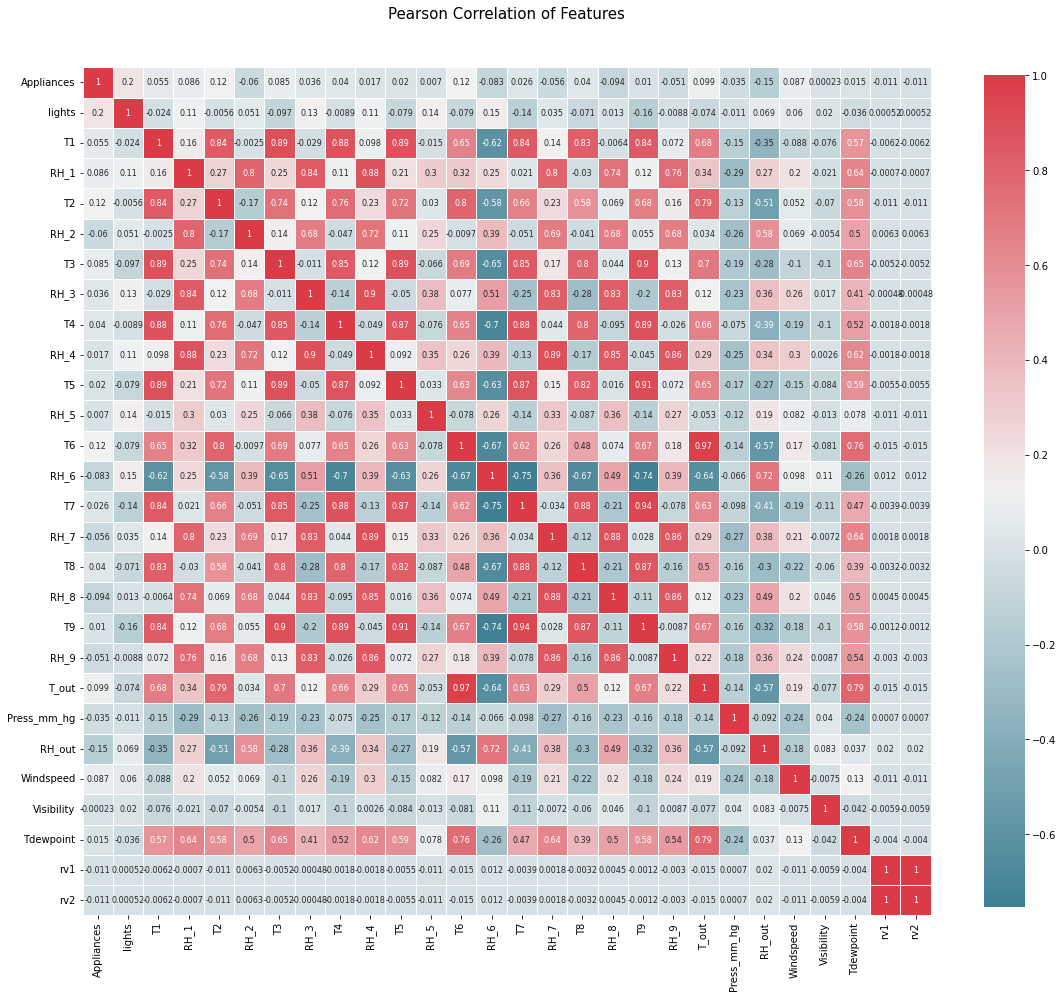

In [7]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(19, 17))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

In [8]:
df.drop(['rv2', 'rv1', 'Visibility'], axis = 1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,13.2


In [9]:
y = df['Appliances']
X = df.drop(['Appliances', 'date'], axis = 1)
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<center id="pre-processing">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Pré-traitement ⚙️
        </h2>
</center>

<div id="split-data">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Diviser les données
        </h3>
</div>



<span style="color:grey; font-size:1.2em">Nous commençons par diviser notre jeu de données <b>80%</b> pour l'entraînement et <b>20%</b> pour la validation.</span>


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [11]:
print("la taille des données d'entraînement est: ",y_train.shape[0])
print("la taille d'échantillon du test est: ",y_valid.shape[0])

la taille des données d'entraînement est:  15788
la taille d'échantillon du test est:  3947


<div id="scale">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  échelonner les données
        </h3>
</div>

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid)

In [13]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)

In [14]:
print("le nombre des Principal component analysis est: ",pca.n_components_)

le nombre des Principal component analysis est:  26


<center id="model-building">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Construction des modèles 🛠️
        </h2>
</center>

<div id="SVM">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  SVM
        </h3>
</div>

In [15]:
def evaluation(model):
    ypred = model.predict(X_valid)
    
    rmse = np.sqrt(mean_squared_error(y_valid, ypred))
    mae = mean_absolute_error(y_valid, ypred)
    
    print(rmse)
    print(mae)

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='neg_mean_squared_error',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
    return rmse, mae

In [16]:
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

SVR()

98.61542456284482
42.1517454278291


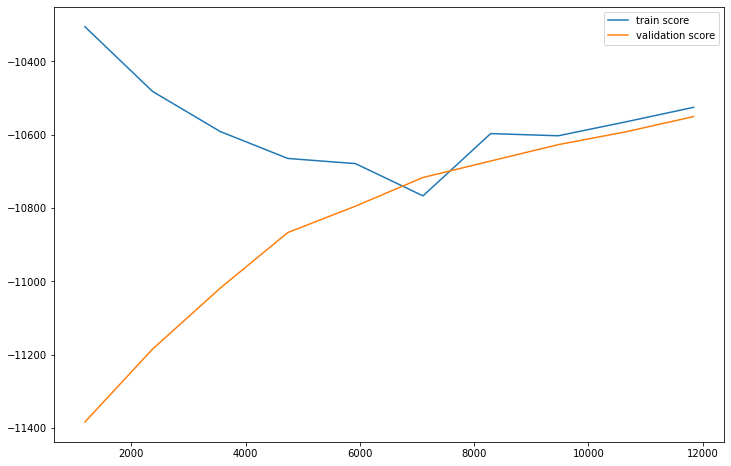

(98.61542456284482, 42.1517454278291)

In [17]:
evaluation(svm)

<div id="KR">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Kernel Ridge
        </h3>
</div>

In [18]:
kernel_ridge = KernelRidge(kernel ='rbf', alpha=1.0)

In [19]:
kernel_ridge.fit(X_train, y_train)

KernelRidge(alpha=1.0, kernel='rbf')

82.37856249352562
45.25606640109127


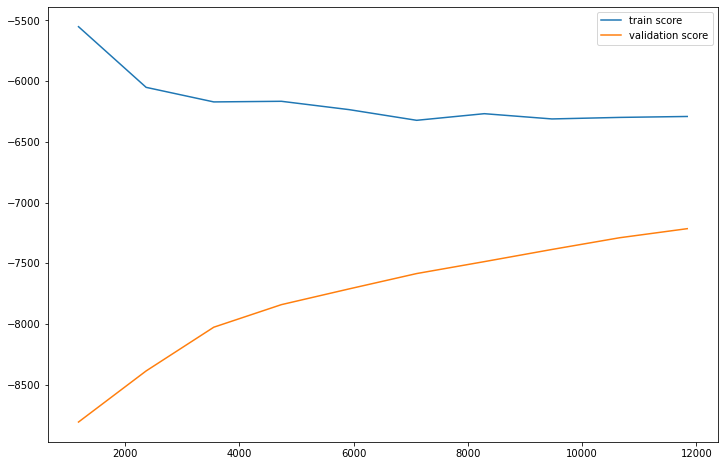

(82.37856249352562, 45.25606640109127)

In [20]:
evaluation(kernel_ridge)

<div id="RBF">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Réseaux RBF
        </h3>
</div>

In [21]:
nbreClasses = 10
def rbf(x, c, s):
    distance = np.linalg.norm(np.array(x) - np.array(c))
    return 1 / np.exp(-distance/(2*s**2))
    
def kmeans(X, k, itersmax = 100): 
    
    clusters = X[np.random.choice(range(len(X)), k, replace=False)]
    converged = False
    
    iter = 0
    while (not converged) and (iter<itersmax):  
        
        cluster_list = [[] for i in range(len(clusters))]
        for x in X:
            distances = []
            for c in clusters:
                distances.append(np.linalg.norm(np.array(x) - np.array(c)))
            cluster_list[int(np.argmin(distances))].append(x)
            
        cluster_list = list((filter(None, cluster_list)))
        
        prevClusters = clusters.copy()
        clusters = []
        
        for j in range(len(cluster_list)):
            clusters.append(np.mean(cluster_list[j], axis = 0))
            
        diff = np.abs(np.sum(prevClusters) - np.sum(clusters))
        converged = (diff==0)
        
        iter += 1
        
    stds = [np.std(x) for x in cluster_list]
    return np.array(clusters), stds

In [22]:
class RBFNet(object):
    
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k = 2, lr = 0.01, epochs = 100, rbf = rbf, inferStds = True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.w = np.random.randn(10, k)
        self.b = np.random.randn(10, 1)
    
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = np.max([np.linalg.norm(np.array(c1) - np.array(c2)) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])
                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2
                print('Loss: {0:.2f}'.format(loss[0]))
                # backward pass
                error = -(y[i] - F).flatten()
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([rbf(X[i], c, s) for c, s in zip(self.centers, self.stds)])
            F = self.w.dot(a.T) + self.b
            y_pred.append(F)
        return np.array(y_pred)

In [ ]:
rbf_net = RBFNet(lr = 0.01, k = 15, epochs = 100)

X_train = np.squeeze(np.asarray(X_train))
y_train = np.squeeze(np.asarray(y_train))

    
rbf_net.fit(X_train, y_train)

In [ ]:
class RBF():
    def __init__(self, k, epochs, lr=0.01):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def gaussian(self ,x, center, sig):
        return np.exp((-1 / (2 * sig ** 2)) * (x - center) ** 2)

    def sig_finder(self,clusters,X,k):
        '''
            computing spreads of clusters
            finding clusters with 1 or 0 points and compute their spreads as mean of others` spreads
        '''
        sigma = np.zeros(k)
        ideal_cluster = np.argmin(np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :])), axis=1)
        averg = []
        outliers = []
        for i in range(k):
            pointsForCluster = X[ideal_cluster == i]
            if len(pointsForCluster) < 2:
                outliers.append(i)
            else:
                averg.append(X[ideal_cluster == i])
                sigma[i] = np.std(X[ideal_cluster == i])
        averg = np.concatenate(averg)
        sigma[outliers] = np.mean(np.std(averg))
        return sigma

    def clustering(self ,X, k):
        ''' uniform setting of initial centers '''
        lx = len(X)
        diff = lx / k
        o = []
        for i in range(0, k):
            o.append(X[int(diff * i)])
        clusters = np.array(o)
        ''' random choice of initial centers '''
        # clusters = np.random.choice(np.squeeze(X), size=k)
        before = clusters.copy()
        flag = True
        while flag:
            '''find the cluster that's closest to each point'''
            ideal_cluster = np.argmin(np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :])), axis=1)
            '''updating each cluster by taking the mean of all of the points in it'''
            for i in range(k):
                Numbers = X[ideal_cluster == i]
                if len(Numbers) > 0:
                    clusters[i] = np.mean(Numbers, axis=0)
            flag = np.average(clusters - before) > 0.000001
            before = clusters.copy()
        sigma = self.sig_finder(clusters,X,k)
        return clusters, sigma

    def fit(self, X, y):
        self.centers, self.stds = self.clustering(X, self.k)
        for epoch in range(self.epochs):
            if epoch % 100 ==0:
                print("epoch "+str(epoch))
            for i in range(len(X)):
                # forward pass
                sig=np.array(self.gaussian(X[i], self.centers, self.stds))
                Y = np.dot(sig,self.w) + self.b
                # backward pass
                error = -(y[i] - Y)
                self.w = self.w - self.lr * sig * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            sig = np.array(self.gaussian(X[i], self.centers, self.stds))
            Y = sig.dot(self.w) + self.b
            y_pred.append(Y)
        return np.array(y_pred)

In [ ]:
rbf_net = RBF(lr = 0.01, k = 15, epochs = 200)

X_train = np.squeeze(np.asarray(X_train))
y_train = np.squeeze(np.asarray(y_train))

    
rbf_net.fit(X_train, y_train)

<div id="RBF-Keras">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Réseaux RBF avec Keras
        </h3>
</div>

In [ ]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
X_train.shape

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy


<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 4 couches</b>.</span>

In [ ]:
RBF_Keras = Sequential()
RBF_Keras.add(Flatten(input_shape=(26,)))
RBF_Keras.add(RBFLayer(100, 0.5))
RBF_Keras.add(RBFLayer(60, 0.5))
RBF_Keras.add(Dense(1, activation='linear'))

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>mean_absolute_error</i> . pour <b>optimizer</b> on choisit: <i>rmsprop</i> ( Root Mean Squared Propagation ).</span>

In [ ]:
RBF_Keras.compile(optimizer='rmsprop', loss = 'mean_absolute_error')

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [ ]:
RBF_Keras.summary()

<span style="color:grey; font-size:1.2em">Créons un objet contenant l'historique de notre formation de modèle:</span>

In [ ]:
history = RBF_Keras.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 100, batch_size = 8)

<span style="color:grey; font-size:1.2em">Traçons l'historique de nos score de modèle sur les données d'entraînement et de validation pour chaque <b>Epoch</b>.</span>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [ ]:
ypred = RBF_Keras.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, ypred))
mae = mean_absolute_error(y_valid, ypred)
print(rmse)
print(mae)

<center id="Conclusion">
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h2>
</center>

<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer le cycle de vie d'un project de Data Science en general et du Machine Learning et Deep Learning en particulier. On bien appris comment analyser et transformer les données, dans la partie du Pré-traitement on a diviser les données et vectoriser les phrases, et dernièrement la construction des modèles en essayant différentes approches: SVF et RBF NET.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir les techniques d'utiliser des réseaux RBF pour l’analyse et prédire.</span>
</div>